# Separierte Faltung mit Gauß

In [5]:
#Imports
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math

In [6]:
# Gaussformel
def gauss(n, sigma):
    return np.exp(-((n * n) / (2 * sigma * sigma))) / np.sqrt(2 * np.pi * sigma * sigma)

In [91]:
def create_convolution_kernel(sigma, precision):
    # k berechnen
    k = int (precision * sigma)
    
    # Array für Gausskern initialisieren
    kernel = np.zeros(2 * k + 1)
    
    # Gaussfunktion anwenden
    for n in range(-k,k+1):
        kernel[n + k] = gauss(n, sigma)
    
    # Debug: print kernel
    print(f"kernel: {kernel}")

    # Kern in Ganzzahlkern umwandeln
    int_kernel = np.zeros_like(kernel)
    for i in range(len(kernel)):
        int_kernel[i] = round(kernel[i]/kernel[0])

    # Debug: print int_kernel
    print(f"int_kernel: {int_kernel}")

    # Summe aller Kernelemente auf 1 normieren
    sum = 0
    for i in range(len(int_kernel)):
        sum += int_kernel[i]
    normed_kernel = int_kernel / sum

    # Debug: print kernel
    print(f"normed_kernel: {normed_kernel}")
    return normed_kernel

In [8]:
create_convolution_kernel(1.05, 2.5)
#np.array([1,4,6,4,1]) / sum(np.array([1,4,6,4,1]))

kernel: [0.0619277  0.24141365 0.37994503 0.24141365 0.0619277 ]
int_kernel: [1. 4. 6. 4. 1.]
normed_kernel: [0.0625 0.25   0.375  0.25   0.0625]


array([0.0625, 0.25  , 0.375 , 0.25  , 0.0625])

In [178]:
def convolute_1D(image_array, kernel, horizontal=1):
    # Array für die Faltung initialisieren
    convoluted_image_array = np.zeros(image_array.shape)

    # Maße des Bildes bestimmen
    height, width = image_array.shape

    # Faltungsrichtung bestimmen (horizontal / vertikal)
    vertical = int(not(horizontal))

    # Padding: Wrap Border
    padding_width = int(len(kernel) / 2 + 1)
    padded_image_array = np.pad(image_array, padding_width, mode='wrap')

    # Faltung
    for x in range(width):
        for y in range(height):
            for k in range(len(kernel)):
                old_pixel = padded_image_array[padding_width + y - vertical * k][padding_width + x - horizontal * k]
                new_pixel = old_pixel * kernel[k]
                convoluted_image_array[y][x] += new_pixel

    return convoluted_image_array

kernel: [0.04839414 0.05793831 0.06664492 0.07365403 0.07820854 0.07978846
 0.07820854 0.07365403 0.06664492 0.05793831 0.04839414]
int_kernel: [1. 1. 1. 2. 2. 2. 2. 2. 1. 1. 1.]
normed_kernel: [0.0625 0.0625 0.0625 0.125  0.125  0.125  0.125  0.125  0.0625 0.0625
 0.0625]


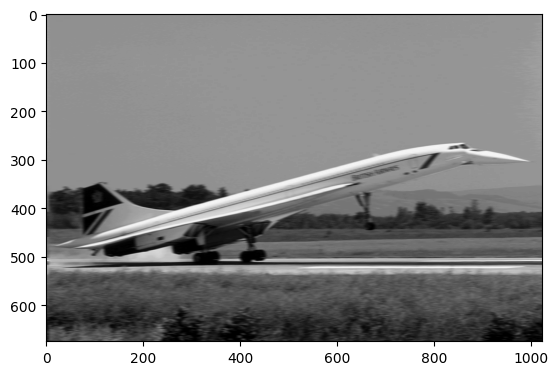

In [10]:
# Bild einlesen und in numpy-array umwandeln
image = Image.open("concorde.png")
image_array = np.array(image, dtype='uint8')

image_array = convolute_1D(image_array, create_convolution_kernel(5, 1))
plt.imshow(image_array, cmap='gray', vmin=0, vmax=256)

In [11]:
def convolute_seperated_2D(image_array, horizontal_kernel, vertical_kernel):
    horizontal_convoluted = convolute_1D(image_array, horizontal_kernel, 1)
    return convolute_1D(horizontal_convoluted, vertical_kernel, 0)

kernel: [0.04839414 0.05793831 0.06664492 0.07365403 0.07820854 0.07978846
 0.07820854 0.07365403 0.06664492 0.05793831 0.04839414]
int_kernel: [1. 1. 1. 2. 2. 2. 2. 2. 1. 1. 1.]
normed_kernel: [0.0625 0.0625 0.0625 0.125  0.125  0.125  0.125  0.125  0.0625 0.0625
 0.0625]


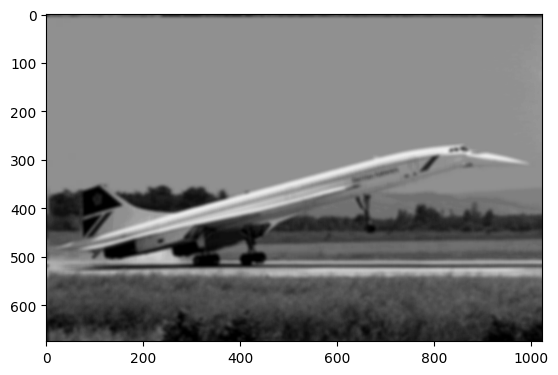

In [12]:
# Bild einlesen und in numpy-array umwandeln
image = Image.open("concorde.png")
image_array = np.array(image, dtype='uint8')

kernel = create_convolution_kernel(5, 1)
image_array = convolute_seperated_2D(image_array, kernel, kernel)
plt.imshow(image_array, cmap='gray', vmin=0, vmax=256)

In [13]:
def create_2D_convolution_kernel(sigma, precision):
    horizontal_kernel = create_convolution_kernel(sigma, precision)
    vertical_kernel = np.transpose(horizontal_kernel)
    
    # dyadisches Produkt
    kernel = np.outer(vertical_kernel, horizontal_kernel)
    
    # Summe aller Kernelemente auf 1 normieren
    sum = 0

    for i in range(len(kernel)):
        for j in range(len(kernel[0])):
            sum += kernel[i][j]
    kernel = kernel / sum 
    print(f"Kernel: {kernel}")
    return kernel

In [32]:
create_2D_convolution_kernel(0.75, 2.5)
hori = np.array([1,2,1])
verti = np.transpose(hori)

kernel = np.outer(verti, hori)
sum = 0

for i in range(len(kernel)):
    for j in range(len(kernel[0])):
        sum += kernel[i][j]
kernel / sum

kernel: [0.2186801  0.53192304 0.2186801 ]
int_kernel: [1. 2. 1.]
normed_kernel: [0.25 0.5  0.25]
Kernel: [[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

kernel: [0.2186801  0.53192304 0.2186801 ]
int_kernel: [1. 2. 1.]
normed_kernel: [0.25 0.5  0.25]
Kernel: [[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


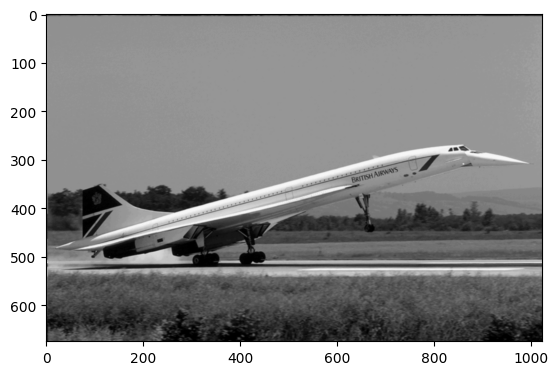

In [45]:
def convolute_2D(image_array, kernel):
    # Array für die Faltung initialisieren
    convoluted_image_array = np.zeros_like(image_array)

    # Maße des Bildes bestimmen
    height, width = image_array.shape

    # Padding: Wrap Border
    padding_width = int(len(kernel) / 2 + 1)
    padded_image_array = np.pad(image_array, padding_width, mode='wrap')

    # Faltung
    for x in range(width):
        for y in range(height):
            for k in range(len(kernel)):
                for l in range(len(kernel[0])):
                    old_pixel = padded_image_array[- padding_width -1 + y + l][- padding_width -1 + x + k]
                    new_pixel = old_pixel * kernel[k][l]
                    convoluted_image_array[y][x] += new_pixel

    return convoluted_image_array

# Bild einlesen und in numpy-array umwandeln
image = Image.open("concorde.png")
image_array = np.array(image, dtype='uint8')

kernel = create_2D_convolution_kernel(0.75, 2.5)
image_array = convolute_2D(image_array, kernel)
plt.imshow(image_array, cmap='gray', vmin=0, vmax=256)

In [43]:
def sum_kernel(kernel):
    sum = 0
    for i in range(len(kernel)):
        for j in range(len(kernel[0])):
            sum += kernel[j][i]
    return sum

kernel: [0.08065691 0.10648267 0.12579441 0.13298076 0.12579441 0.10648267
 0.08065691]
int_kernel: [1. 1. 2. 2. 2. 1. 1.]
normed_kernel: [0.1 0.1 0.2 0.2 0.2 0.1 0.1]
Kernel: [[0.01 0.01 0.02 0.02 0.02 0.01 0.01]
 [0.01 0.01 0.02 0.02 0.02 0.01 0.01]
 [0.02 0.02 0.04 0.04 0.04 0.02 0.02]
 [0.02 0.02 0.04 0.04 0.04 0.02 0.02]
 [0.02 0.02 0.04 0.04 0.04 0.02 0.02]
 [0.01 0.01 0.02 0.02 0.02 0.01 0.01]
 [0.01 0.01 0.02 0.02 0.02 0.01 0.01]]
1.0000000000000002


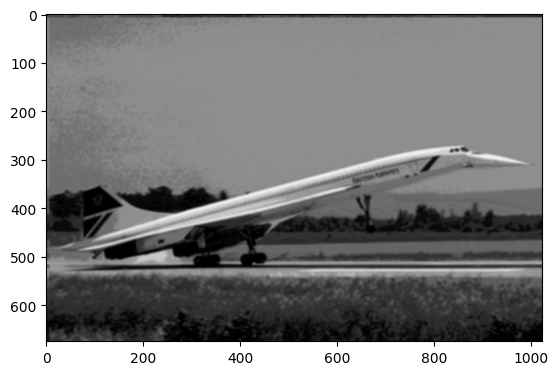

In [46]:
# Bild einlesen und in numpy-array umwandeln
image = Image.open("concorde.png")
image_array = np.array(image, dtype='uint8')

kernel = create_2D_convolution_kernel(3, 1)
print(sum_kernel(kernel))
image_array = convolute_2D(image_array, kernel)
plt.imshow(image_array, cmap='gray', vmin=0, vmax=256)

# Morphologische Filter

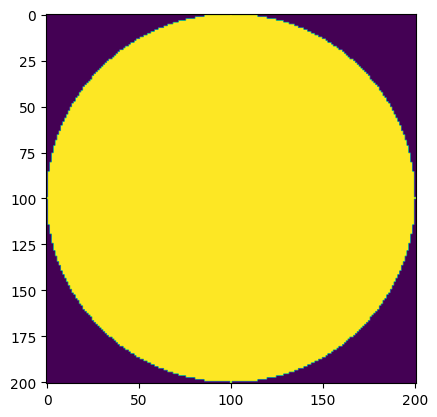

In [17]:
def create_circular_mask(radius):
    # größe der Matrix in Abhängigkeit vom Radius berechnen
    size = radius * 2 + 1

    # leere Matrix erstellen
    circle = np.zeros((size,size))
    
    # über jeden Pixel iterieren und überprüfen, ob er im Kreis ist (mit Pythagoras)
    for x in range(size):
        for y in range(size):
            # Es wird der Abstand zwischen dem derzeitigem Pixel und dem Mittelpunkt ermittelt
            # a^2 + b^2 = c^2
            a = radius - x
            b = radius - y
            c_square = a ** 2 + b ** 2
            c = np.sqrt(c_square)

            # Wenn der Abstand zwischen Mittelpunkt und 
            # derzeitigem Pixel kleinergleich Radius ist, liegt der Pixel im Kreis
            if (c <= radius):
                circle[x][y] = 1
            
    return circle
plt.imshow(create_circular_mask(100))

In [18]:
# Funktioniert nur mit Graubildern
def erode(image_array, radius): 
    
    # Konstante definieren
    MAX_PIXEL_VALUE = 255

    # Maße des Bildes bestimmen
    height, width = image_array.shape

    # Maske erzeugen
    mask = create_circular_mask(radius)

    # 0 mit maximal möglichem Wert ersetzen, damit besser das Minimum bestimmt werden kann
    mask[mask == 0] = MAX_PIXEL_VALUE

    # Constant-Border als Randbehandlung
    padded_image_array = np.pad(image_array, radius, 'constant', constant_values=MAX_PIXEL_VALUE)

    # Zielbild initialisieren
    eroded_image_array = np.zeros_like(image_array)

    # Maske mit Bild falten
    for x in range(width):
        for y in range(height):
            min = MAX_PIXEL_VALUE
            x_pad = x + radius
            y_pad = y + radius

            for x_mask in range(len(mask)):
                for y_mask in range(len(mask[0])):
                    if (padded_image_array[y_pad- y_mask][x_pad - x_mask] * mask[y_mask][x_mask] < min):
                        min = padded_image_array[y_pad - y_mask][x_pad - x_mask]

            eroded_image_array[y][x] = min
    return eroded_image_array

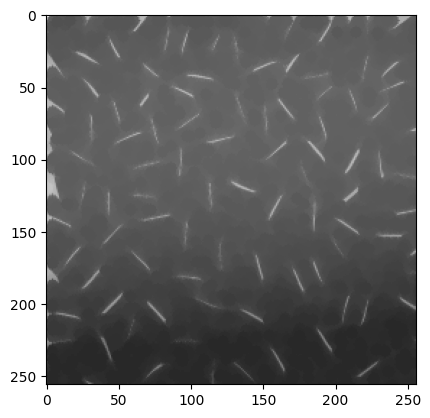

In [19]:
# Bild einlesen und in numpy-array umwandeln
image = Image.open("rice.png")
image_array = np.array(image, dtype='uint8')

# Plot 
plt.imshow(erode(image_array, 4), cmap='gray', vmin=0, vmax=2**8)

In [66]:
# Funktioniert nur mit Graubildern
def dilate(image_array, radius): 
    
    # Konstante definieren
    MIN_PIXEL_VALUE = 0

    # Maße des Bildes bestimmen
    height, width = image_array.shape

    # Maske erzeugen
    mask = create_circular_mask(radius)

    # 0 mit maximal möglichem Wert ersetzen, damit besser das Minimum bestimmt werden kann
    mask[mask == 0] = MIN_PIXEL_VALUE

    # Constant-Border als Randbehandlung
    padded_image_array = np.pad(image_array, radius, 'constant', constant_values=MIN_PIXEL_VALUE)

    # Zielbild initialisieren
    dilated_image_array = np.zeros_like(image_array)

    # Maske mit Bild falten
    for x in range(width):
        for y in range(height):
            max = MIN_PIXEL_VALUE
            x_pad = x + radius
            y_pad = y + radius

            for x_mask in range(len(mask)):
                for y_mask in range(len(mask[0])):
                    if (padded_image_array[y_pad- y_mask][x_pad - x_mask] * mask[y_mask][x_mask] > max):
                        max = padded_image_array[y_pad - y_mask][x_pad - x_mask]

            dilated_image_array[y][x] = max
    return dilated_image_array

[  0   0   0   0 122  92  95  99 102 107  89  90  95 110  91  96  81  87
  93  94 106  89 126 104 122 188 192 192 184 172 182 179 178 127 105 110
 100 105 119  91 114  99 105 100  94 109  96 102  97  90  92 101 109  92
 100  95 101  87 101  95  94 146 181 183 185 190 191 193 189 184 187 181
 110 101 105  95  91  88  90  88  96 103 154 182 171 170 179 176  95 104
  90 156 180 176 160  96  95  88  97  88 105  92  87 109 106  95 111  87
  93 123  92 108 109  95  94  98 100 113  92  97 100  99 104  87  87  88
 104  92 108  95  99 103  99 106 104  94 104 110  96 111  96  95 103  96
 106 100 129  98 142 117 116 188 184 180 179 179 186 159  94 106  95 121
  98 101 119 125  96 134 187 188 185 175 172 174 181 145  97 103 101  98
  99 113  90 118 106  99  98  99 107  94  97  92 116 148 188 184 187 184
 184 183 185 154 102  99 108 117 173 191 191 195 195 195 193 193 163  96
 101 101 110 146 182 183 193 195 194 191 119 109 114 102  94  98  99 116
 111 112  93 105 110  97 121 172 179 174 176 175 17

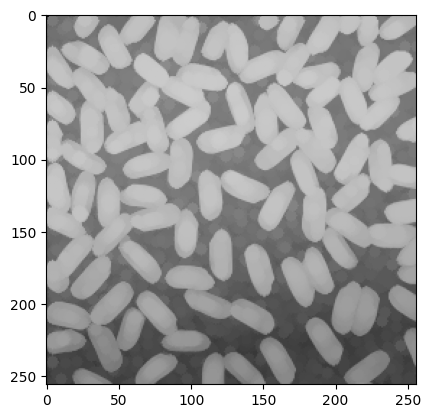

In [21]:
# Bild einlesen und in numpy-array umwandeln
image = Image.open("rice.png")
image_array = np.array(image, dtype='uint8')

# Plot 
plt.imshow(dilate(image_array, 4), cmap='gray', vmin=0, vmax=2**8)

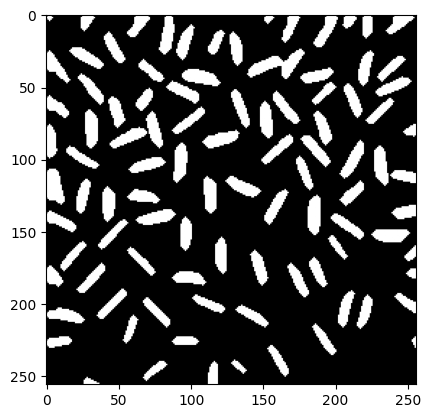

In [67]:
def opening(image_array, radius):
    eroded_image_array = erode(image_array,radius)
    return dilate(eroded_image_array,radius)

# Bild einlesen und in numpy-array umwandeln
image = Image.open("rice_binarisiert.png")
image_array = np.array(image, dtype='uint8')

# Plot 
plt.imshow(opening(image_array, 2), cmap='gray', vmin=0, vmax=2**8)

[  0   0 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 255   0 255 255 255 255 255 255 255 255 255 255   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255   0   0
   0   0   0   0   0   0   0   0 255 255 255 255 255 255   0   0   0 255
 255 255 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 255   0 255   0   0 255 255 255 255 255 255 255   0   0   0 255   0   0
   0 255   0 255 255 255 255 255 255 255 255 255   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0 255 255 255 255 255 255 255
 255 255   0   0   0   0 255 255 255 255 255 255 255 255 255   0   0   0
   0 255 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0
   0   0   0   0 255 255 255 255 255 255 255 255 25

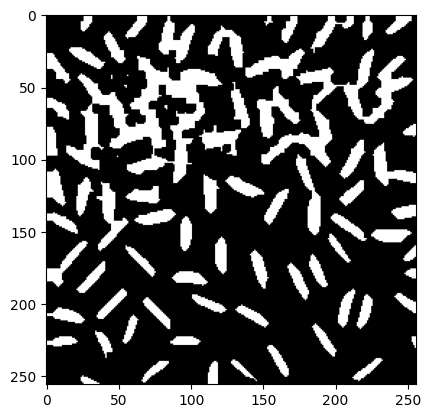

In [23]:
def closing(image_array, radius):
    dilated_image_array = dilate(image_array,radius)
    return erode(dilated_image_array,radius)

# Bild einlesen und in numpy-array umwandeln
image = Image.open("rice_binarisiert.png")
image_array = np.array(image, dtype='uint8')

# Plot 
plt.imshow(closing(image_array, 2), cmap='gray', vmin=0, vmax=2**8)

# Kantenerkennung/Gradienten

In [71]:
def diff(array):
    diff_array = [0]*(len(array)) # neues Array ein Element kleiner machen
    for i in range(len(array)):
        diff_array[i] = array[i] - array[i-1]
    return diff_array

# Beispiel
diff([2,5,4,7,8,3,4,5,6])

[-4, 3, -1, 3, 1, -5, 1, 1, 1]

In [111]:
def gauss_derivation(n, sigma):
    return -(n / (sigma * sigma)) * np.exp(-((n * n) / (2 * sigma * sigma))) / np.sqrt(2 * np.pi * sigma * sigma)

In [112]:
def create_convolution_derived_kernel(sigma, precision):
    # k berechnen
    k = int (precision * sigma)
    
    # Array für Gausskern initialisieren
    kernel = np.zeros(2 * k + 1)
    
    # Gaussfunktion anwenden
    for n in range(-k,k+1):
        kernel[n + k] = gauss_derivation(n, sigma)
    
    # Debug: print kernel
    print(f"kernel: {kernel}")
    
    return kernel

In [203]:
import math
def gauss_gradient_magnitude(image_path, sigma):
    
    # Bild einlesen und in numpy-array umwandeln
    image = Image.open(image_path)
    image_array = np.array(image, dtype='uint8')

    # Gausskern berechnen
    kernel = create_convolution_derived_kernel(sigma, 1.5)

    # Faltung
    image_array_horizontal = convolute_1D(image_array, kernel, 1)
    image_array_vertical = convolute_1D(image_array, kernel, 0)

    return np.sqrt(image_array_horizontal**2 + image_array_vertical**2)

kernel: [ 0.24197072 -0.         -0.24197072]


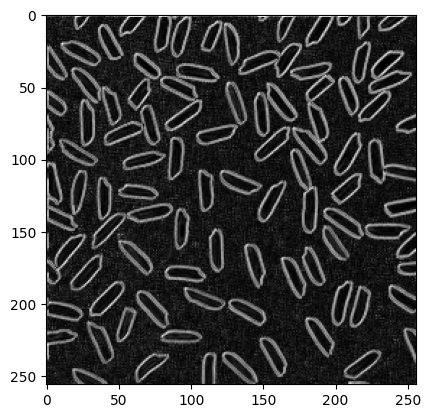

In [205]:
# Plot
plt.imshow(gauss_gradient_magnitude("rice.png", 1), cmap='gray', vmin=0, vmax=2**5)

In [146]:
def morphological_gradient(image_path, radius):
    
    # Bild einlesen und in numpy-array umwandeln
    image = Image.open(image_path)
    image_array = np.array(image, dtype='uint8')

    # Dilatation durchführen
    dilated_image_array = dilate(image_array, radius)

    # Erosion durchführen
    eroded_image_array = erode(image_array, radius)

    # Subtract both results
    return dilated_image_array - eroded_image_array

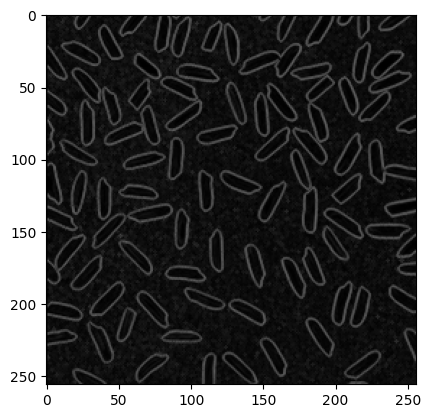

In [183]:
# Plot 
plt.imshow(morphological_gradient("rice.png", 1), cmap='gray', vmin=0, vmax=2**8)